In [21]:
# Data Preperation 

## Initialized Import
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

## Set file path 
whale_returns = Path("Resources/whale_returns.csv")
whale_dataframe = pd.read_csv(whale_returns, parse_dates=['Date'], index_col="Date")

algo_returns = Path("Resources/algo_returns.csv")
algo_dataframe = pd.read_csv(algo_returns, parse_dates=['Date'], index_col="Date")

sp500_returns = Path("Resources/sp500_history.csv")
sp500_dataframe = pd.read_csv(sp500_returns, parse_dates=['Date'], index_col="Date")


## Identified and dropped null records  
whale_dataframe = whale_dataframe.dropna()

sp500_dataframe = sp500_dataframe.dropna()

## Dropped duplicates
whale_dataframe = whale_dataframe.drop_duplicates()

algo_dataframe = algo_dataframe.drop_duplicates()

sp500_dataframe = sp500_dataframe.drop_duplicates()

## Deafult null "algo 2" values to zero
algo_dataframe['Algo 2'] = algo_dataframe['Algo 2'].fillna(0)

## Cleaning "Price" series by removing $
sp500_dataframe["Close"] = sp500_dataframe["Close"].str.replace('$', '')

##Converting sp500 "Close" values to int
sp500_dataframe['Close'] = pd.to_numeric(sp500_dataframe['Close'])

## Convert S&P500 closing prices to daily returns
### "sp500_return" is the new dataframe
sp500_return = sp500_dataframe.pct_change()

## Sort out Data in ascending order

whale_ascend = whale_dataframe.sort_values("Date", ascending=True)
algo_ascend = algo_dataframe.sort_values("Date", ascending=True)
sp500_ascend = sp500_return.sort_values("Date", ascending=True)

## Concatenating all dataframes to merge columns into a single dataframe 
whale_algo = pd.concat([whale_ascend,algo_ascend], axis= 'columns', join='outer')

combined_portfolio = pd.concat([whale_algo,sp500_ascend], axis= 'columns', join='outer')


## Identified and dropped null records in the combined portfolio
combined_portfolio = combined_portfolio.dropna()

## Dropped duplicates in the combined protfolio
combined_portfolio = combined_portfolio.drop_duplicates()


<ipython-input-21-34b11f2fddbd>:36: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_dataframe["Close"] = sp500_dataframe["Close"].str.replace('$', '')


<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

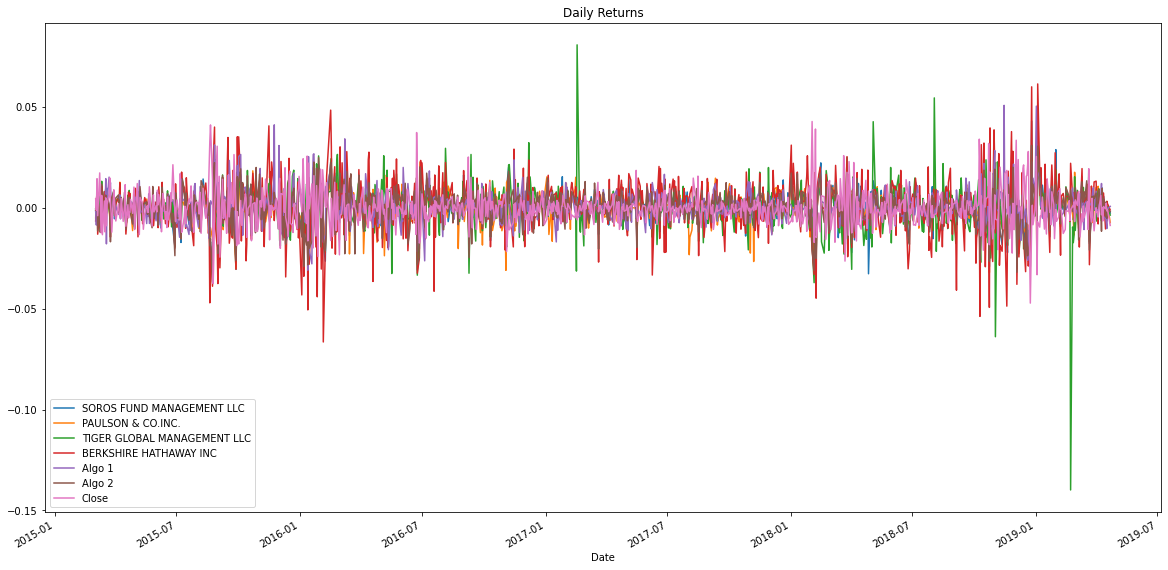

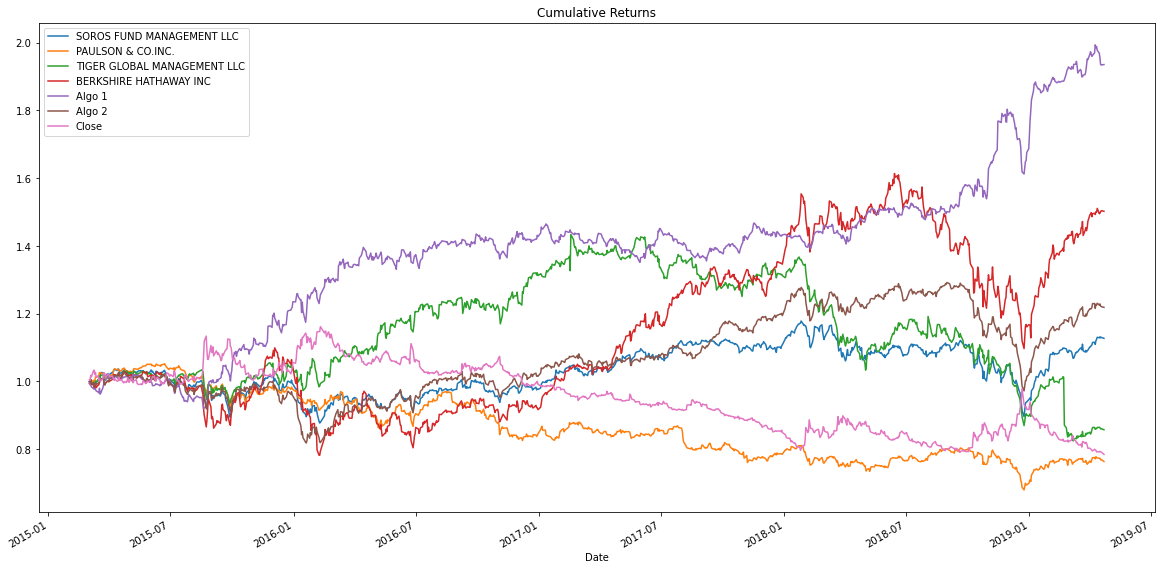

In [36]:
# Performance analysis 

## Daily returns of all portfolios
combined_portfolio.plot(title='Daily Returns', figsize=(20,10))

## Calculating the cumulative and daily returns of all portfolios
cumulative_returns = (1 + combined_portfolio).cumprod()
cumulative_returns.plot(title='Cumulative Returns', figsize=(20,10))

In [40]:
# Risk analysis 

##

## Calculating the standard deviation for each portfolio 

portfolio_std = combined_portfolio.std()
portfolio_std = portfolio_std.sort_values(ascending=False)
portfolio_std

BERKSHIRE HATHAWAY INC         0.013133
TIGER GLOBAL MANAGEMENT LLC    0.011084
Close                          0.008630
Algo 2                         0.008329
SOROS FUND MANAGEMENT LLC      0.008028
Algo 1                         0.007690
PAULSON & CO.INC.              0.007125
dtype: float64